In [2]:
%matplotlib nbagg

In [3]:
import seaborn as sns
sns.set_context('talk')
sns.set_style('white')

/usr/local/python3/miniconda/lib/python3.4/site-packages/matplotlib-1.5.0rc2-py3.4-linux-x86_64.egg/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [4]:
cd ~/superdark/

/home/klay6683/superdark


In [5]:
from iuvs import io

In [8]:
def read_superdark():
    from scipy.io import idl
    d = idl.readsav('./xmas_aurora_superdark_v1.sav', python_dict=True)
    superdark = d['xmas_aurora_superdark']
    return superdark

In [9]:
def get_sensitivity_curve(l1b):
    return l1b.detector_dark_subtracted[8,2,:]/l1b.img[8,2,:]

In [10]:
def fit_superdark_to_localdark(dark):
    superdark = read_superdark()
    x = superdark.ravel()
    y = dark.ravel()
    p = np.poly1d(np.polyfit(x, y, 1))
    return p(superdark)

In [11]:
def recalibrate_primary_muv(l1b):
    superdark = fit_superdark_to_localdark(l1b.detector_dark[1])
    primary_muv = l1b.detector_raw - superdark
    primary_muv_cal = primary_muv / get_sensitivity_curve(l1b)
    return primary_muv_cal

In [12]:
def get_compressed_spectrogram(img):
    return img[:, 2:5, :].mean(axis=1)

In [13]:
def do_my_subtract(l1b):
    sensitivity_curve = get_sensitivity_curve(l1b)
    mysubbed = []
    for i in range(21):
        darkfitter = scaling.DarkFitter(l1b, i, 1)
        scaler = darkfitter.scalers[-1]
        fitted_dark = scaler.apply_fit(darkfitter.fulldark)
        mysubbed.append(darkfitter.fullraw - fitted_dark)
    mysubbed = np.array(mysubbed)
    mysubbed = mysubbed/ sensitivity_curve
    return mysubbed

In [54]:
from iuvs import scaling
import os

def process_one_file(fname):
    print(os.path.basename(fname))
    l1b = io.L1BReader(fname, stage=False)
    current = get_compressed_spectrogram(l1b.img)

    recal = recalibrate_primary_muv(l1b)
    recal_comp = get_compressed_spectrogram(recal)
    
    mysubbed = do_my_subtract(l1b)
    mycompressed = get_compressed_spectrogram(mysubbed)
    return current, recal_comp, mycompressed

In [48]:
fnames = sorted(list(io.l1b_filenames('periapse-orbit00800-muv', env='production')))
print("Found", len(fnames))

fnames = fnames[:-1]

/maven_iuvs/production/products/level1b
Found 13


In [50]:
for fname in fnames:
    for data, container in zip(process_one_file(fname), [current, recal, mysub]):
        container.append(data)

/maven_iuvs/production/products/level1b/mvn_iuv_l1b_periapse-orbit00800-muv_20150227T124712_v02_r01.fits.gz
/maven_iuvs/production/products/level1b/mvn_iuv_l1b_periapse-orbit00800-muv_20150227T124900_v02_r01.fits.gz
/maven_iuvs/production/products/level1b/mvn_iuv_l1b_periapse-orbit00800-muv_20150227T125048_v02_r01.fits.gz
/maven_iuvs/production/products/level1b/mvn_iuv_l1b_periapse-orbit00800-muv_20150227T125235_v02_r01.fits.gz
/maven_iuvs/production/products/level1b/mvn_iuv_l1b_periapse-orbit00800-muv_20150227T125423_v02_r01.fits.gz
/maven_iuvs/production/products/level1b/mvn_iuv_l1b_periapse-orbit00800-muv_20150227T125611_v02_r01.fits.gz
/maven_iuvs/production/products/level1b/mvn_iuv_l1b_periapse-orbit00800-muv_20150227T125816_v02_r01.fits.gz
/maven_iuvs/production/products/level1b/mvn_iuv_l1b_periapse-orbit00800-muv_20150227T130004_v02_r01.fits.gz
/maven_iuvs/production/products/level1b/mvn_iuv_l1b_periapse-orbit00800-muv_20150227T130152_v02_r01.fits.gz
/maven_iuvs/production/produ

In [51]:
current = np.array(current)
recal = np.array(recal)
mysub = np.array(mysub)

In [67]:
def get_periapse_fnames(orbit):
    nfiles = 0
    while nfiles == 0:
        orbit += 1
        s = 'periapse-orbit{}-muv'.format(str(orbit).zfill(5))
        fnames = sorted(list(io.l1b_filenames(s, env='production')))
        nfiles = len(fnames)
        
    print("Found periapse data at orbit:", orbit)
    return fnames[:-1], orbit
    

In [200]:
from iuvs.superdark import Quicklooker

Found periapse data at orbit: 400
mvn_iuv_l1b_periapse-orbit00400-muv_20141213T101919_v02_r01.fits.gz
mvn_iuv_l1b_periapse-orbit00400-muv_20141213T102105_v02_r01.fits.gz
mvn_iuv_l1b_periapse-orbit00400-muv_20141213T102251_v02_r01.fits.gz
mvn_iuv_l1b_periapse-orbit00400-muv_20141213T102436_v02_r01.fits.gz
mvn_iuv_l1b_periapse-orbit00400-muv_20141213T102622_v02_r01.fits.gz
mvn_iuv_l1b_periapse-orbit00400-muv_20141213T102807_v02_r01.fits.gz
mvn_iuv_l1b_periapse-orbit00400-muv_20141213T103011_v02_r01.fits.gz
mvn_iuv_l1b_periapse-orbit00400-muv_20141213T103157_v02_r01.fits.gz
mvn_iuv_l1b_periapse-orbit00400-muv_20141213T103342_v02_r01.fits.gz
mvn_iuv_l1b_periapse-orbit00400-muv_20141213T103528_v02_r01.fits.gz
mvn_iuv_l1b_periapse-orbit00400-muv_20141213T103714_v02_r01.fits.gz
mvn_iuv_l1b_periapse-orbit00400-muv_20141213T103900_v02_r01.fits.gz
Found periapse data at orbit: 437
mvn_iuv_l1b_periapse-orbit00437-muv_20141220T115005_v02_r01.fits.gz
mvn_iuv_l1b_periapse-orbit00437-muv_20141220T115

ERROR: Internal Python error in the inspect module.
Below is the traceback from this internal error.



  File "/usr/local/python3/miniconda/lib/python3.4/tokenize.py", line 407, in detect_encoding
    first = read_or_stop()
  File "/usr/local/python3/miniconda/lib/python3.4/tokenize.py", line 365, in read_or_stop
    return readline()
KeyboardInterrupt



Unfortunately, your original traceback can not be constructed.



TypeError: 'NoneType' object is not iterable

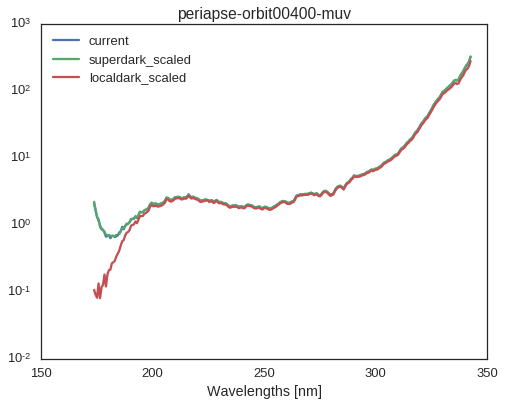

In [202]:
for orbit in [400, 437, 500, 600, 700, 800]:
    ql = Quicklooker(orbit)
    ql.do_all()

In [164]:
from iuvs import superdark

In [178]:
mysubbed = superdark.do_my_subtract(l1b)

In [184]:
mysubbed.mean(axis=(1,2))

array([ 0.19462709,  0.15394063,  0.17569962,  0.27506508,  0.14919433,
        0.15822864,  0.20399661,  0.26588175,  0.1184821 ,  0.21599391,
        0.14194977,  0.18742393,  0.13754396,  0.15926876,  0.09791922,
        0.13540317,  0.12691727,  0.17909631,  0.47939633,  0.0006192 ,
        0.14986101])

In [183]:
l1b.img.mean(axis=(1,2))

array([ 0.23741511,  0.27679253,  0.12559251,  0.44098237,  0.20334299,
        0.30323699,  0.26624247,  0.3087528 ,  0.38913482,  0.33303446,
        0.29127064,  0.27217436,  0.23731168,  0.30732694,  0.17682232,
        0.28312337,  0.20328011,  0.68429697,  0.64327228,  0.25392559,
        0.25427204], dtype=float32)

In [169]:
recal = superdark.recalibrate_primary_muv(l1b)

In [170]:
recal.mean()

0.33103448807926666

In [171]:
from iuvs import scaling

In [172]:
darkfitter = scaling.DarkFitter(l1b, 2, 1)

In [173]:
scaler = darkfitter.scalers[-1]

In [167]:
mysubbed.mean()

9.135632187545905e-05

In [ ]:
ql438.do_all()

# LINFIT / polyfit

In [13]:
l1b = io.L1BReader(fnames[3])

In [17]:
fitteddark = fit_superdark_to_localdark(l1b.detector_dark[1])

In [18]:
superdark = read_superdark()

<IPython.core.display.Javascript object>


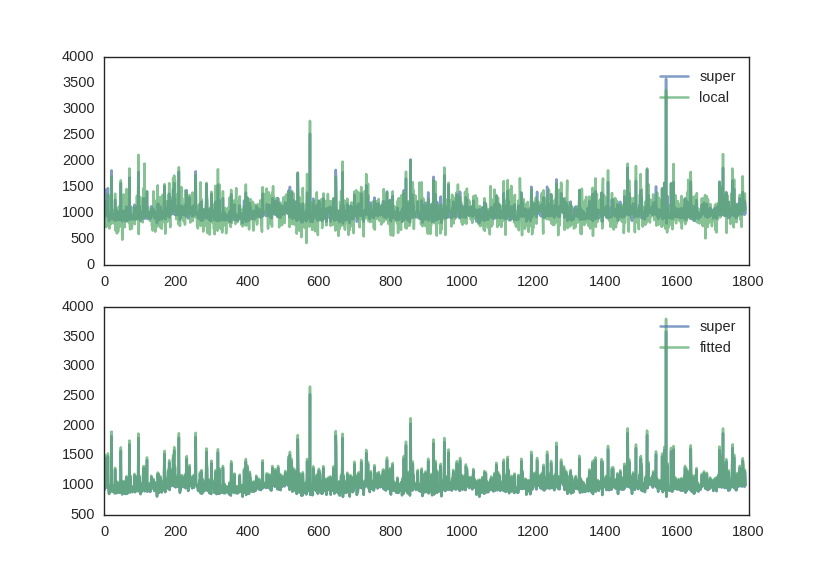

In [22]:
fig, ax = plt.subplots(nrows=2)
ax[0].plot(superdark.ravel(), label='super', alpha=0.7)
ax[0].plot(l1b.detector_dark[1].ravel(), label='local', alpha=0.7)
ax[0].legend()
ax[1].plot(superdark.ravel(), label='super', alpha=0.7)
ax[1].plot(fitteddark.ravel(), label='fitted', alpha=0.7)
ax[1].legend()

In [115]:
w = np.sqrt(np.abs(Y))

In [124]:
z = polyfit(X, Y, 1)

In [125]:
z

array([ 0.86732935, -3.44595979])

In [99]:
def plot_stuff(i):
    fig, axes = plt.subplots(nrows=2)
    cmap = 'cubehelix'
    vmax = primary_muv_cal[i].max()
    im1 = axes[0].imshow(l1b.img[i], aspect='auto', interpolation='none', cmap=cmap,
                         vmax=vmax, vmin=0.001)
    plt.colorbar(im1, ax=axes[0])
    im2 = axes[1].imshow(primary_muv_cal[i], aspect='auto', interpolation='none', cmap=cmap,
                         vmax=vmax, vmin=0.001)
    plt.colorbar(im2, ax=axes[1])

In [100]:
from ipywidgets import interact

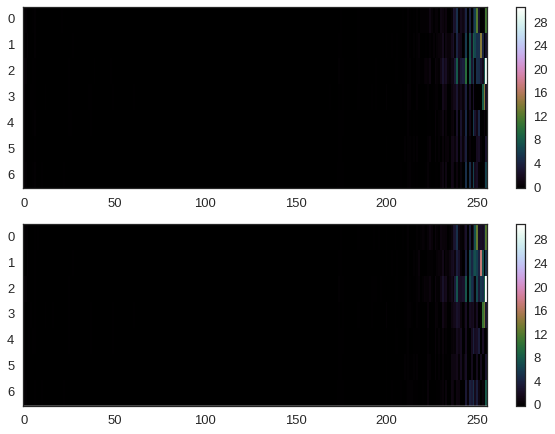

In [101]:
interact(plot_stuff, i=(0, len(l1b.img) -1))

In [118]:
l1b = io.L1BReader(fnames[0])

In [117]:
plt.plot(l1b.img.mean(axis=(1,2)), label='l1b.img')
plt.plot(primary_muv_cal.mean(axis=(1,2)), label='superdark applied')
plt.legend()

NameError: name 'l1b' is not defined

In [106]:
a1 = l1b.img.mean(axis=(1,2))
a2 = primary_muv_cal.mean(axis=(1,2))

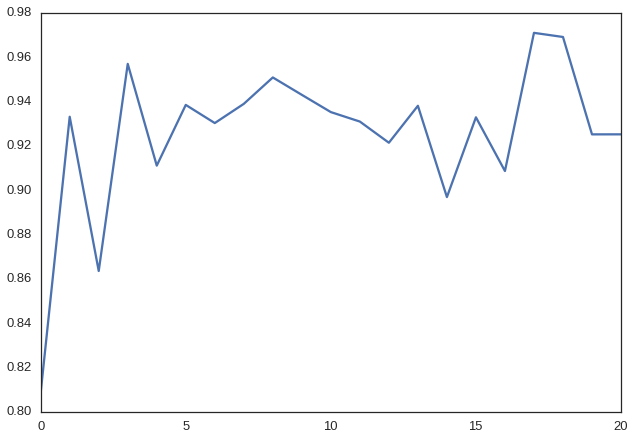

In [107]:
plt.plot(a1/a2)

In [121]:
l1b.img[0:3].mean(axis=0).shape

(7, 256)

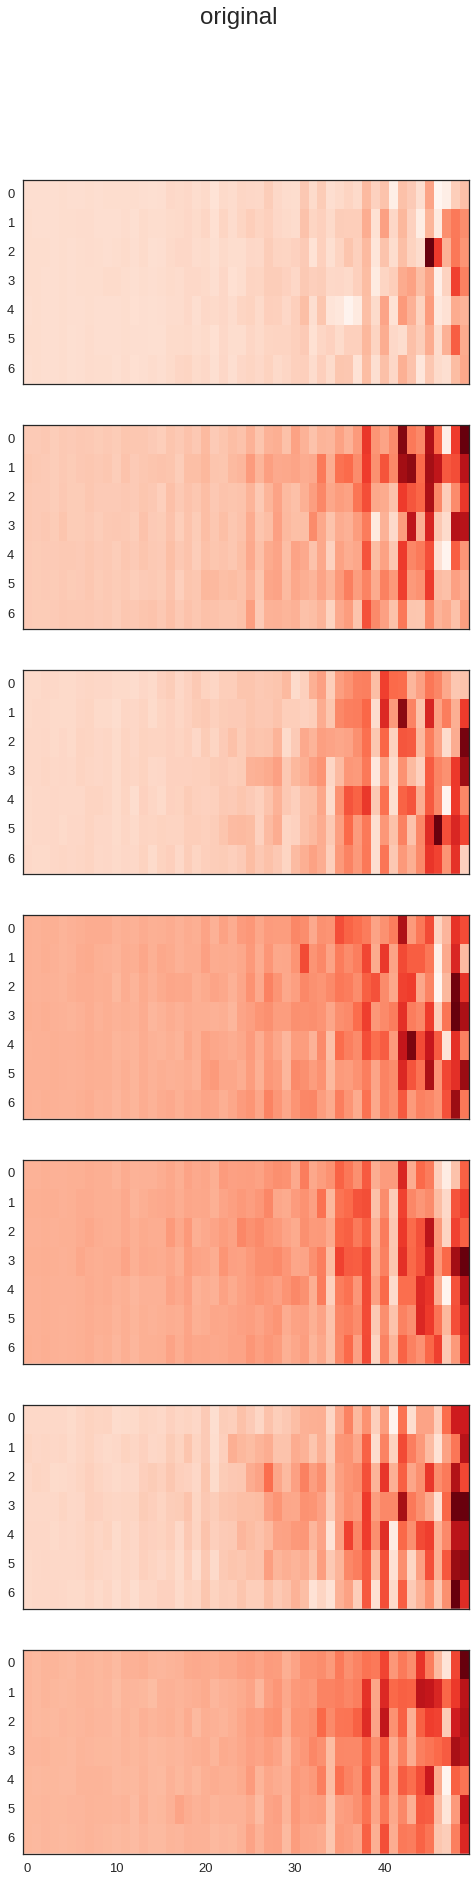

In [124]:
fig, axes = plt.subplots(nrows=7, figsize=(8, 30), sharex=True)
cmap=plt.cm.Reds
data = l1b.img
for i, ax in zip(range(0, 22, 3), axes.ravel()):
    ax.imshow(data[i:i+3].mean(axis=0)[:,-50:], aspect='auto', interpolation='none',
              cmap=cmap)
fig.suptitle('original', fontsize=24)
fig.savefig('original.pdf', dpi=120)

In [125]:
from iuvs import scaling

In [127]:
darkfitter = scaling.DarkFitter(l1b, 1, 1)

In [129]:
scaler = darkfitter.scalers[-1]

In [133]:
mysubbed = []
for i in range(21):
    darkfitter = scaling.DarkFitter(l1b, i, 1)
    scaler = darkfitter.scalers[-1]
    fitted_dark = scaler.apply_fit(darkfitter.fulldark)
    mysubbed.append(darkfitter.fullraw - fitted_dark)

In [134]:
mysub = np.array(mysubbed)

In [140]:
mysub = mysub/ sensitivity_curve

In [141]:
mysub.shape

(21, 7, 256)

In [151]:
def calc_4_to_3(width):
    height = width * 3 / 4
    return (width, height)

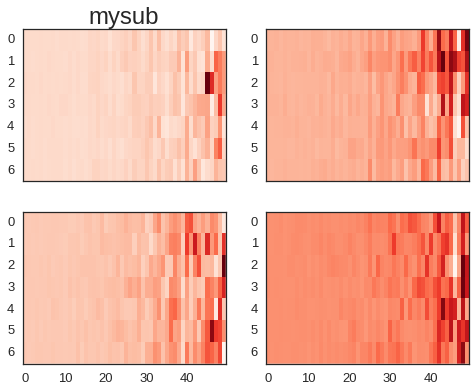

In [153]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=calc_4_to_3(8), sharex=True)
cmap=plt.cm.Reds
data = mysub
for i, ax in zip(range(0, 12, 3), axes.ravel()):
    ax.imshow(data[i:i+3].mean(axis=0)[:,-50:], aspect='auto', interpolation='none',
              cmap=cmap)
    
axes.ravel()[0].set_title('mysub', fontsize=24)
fig.savefig('mysub.pdf', dpi=120)

In [179]:
cmap=plt.cm.Reds

profiles = []
for data, name in zip([l1b.img, primary_muv_cal, mysub], ['original', 'super_applied', 'mysub']):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=calc_4_to_3(8), sharex=True)
    if name=='mysub':
        data = data * l1b.scaling_factor
    for i, ax in zip(range(0, 12, 3), axes.ravel()):
        toplot = data[i:i+3].mean(axis=0)[:,-50:]
        profiles.append(toplot.mean(axis=0))
        im = ax.imshow(toplot, aspect='auto', interpolation='none',
                  cmap=cmap, vmax=13, vmin=0)
        plt.colorbar(im, ax=ax)
    axes.ravel()[0].set_title(name, fontsize=24)
    fig.savefig(name+'.pdf', dpi=120)
    plt.close(fig)

In [182]:
profiles = np.array(profiles)

In [183]:
profiles.shape

(12, 50)

In [185]:
profiles[:4].shape

(4, 50)

In [191]:
profiles[::4].shape

(3, 50)

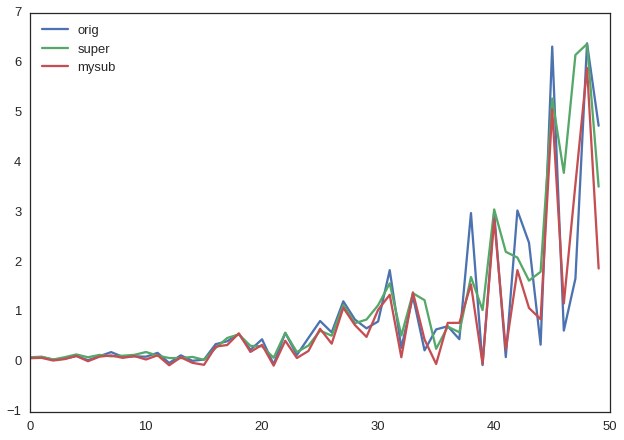

In [203]:
for prof,label in zip(profiles[::4], ['orig','super','mysub']):
    plt.plot(prof, label=label)
plt.legend(loc='best')
plt.savefig('profiles.pdf', dpi=120)

49.145008

In [161]:
l1b.Dark_Integration['UTC']

chararray(['2014/354 Dec 20 11:49:48.39451UTC',
       '2014/354 Dec 20 11:49:53.19450UTC',
       '2014/354 Dec 20 16:24:38.56752UTC',
       '2014/354 Dec 20 16:24:43.36751UTC'], 
      dtype='<U33')

In [164]:
l1b.Dark_Integration['DET_TEMP_C']

array([-21.1094, -21.1094, -21.8584, -21.8584])

In [165]:
l1b.Dark_Integration['CASE_TEMP_C']

array([ 4.98145553,  4.98145553,  4.90577179,  4.90577179])